ПРОВЕРКА НОРМИРОВКИ ПЛОТНОСТИ
∫f(x)dx на [0.0, 2.0] = 1.000000 (ошибка: 1.11e-14)

ПРОВЕРКА В ГРАНИЧНЫХ ТОЧКАХ
F(0.0) = 0.000000
F(2.0) = 1.000000

Размер выборки: 10000
Первые 10 значений: [1.44165976 1.96658779 1.80246078 1.68560719 1.0766854  1.07662992
 0.77454716 1.90647919 1.68790961 1.78260829]

*************ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ**************
Математическое ожидание: 1.5000
Дисперсия: 0.1500
Среднее квадратическое отклонение: 0.3873

70%-квантиль: 1.7758
80%-ная точка: 1.8566

КОЭФФИЦИЕНТЫ ФОРМЫ РАСПРЕДЕЛЕНИЯ
Коэффициент асимметрии: -0.8607
Коэффициент эксцесса: 0.0952

P(0.5 < X < 1.5) = 0.4062


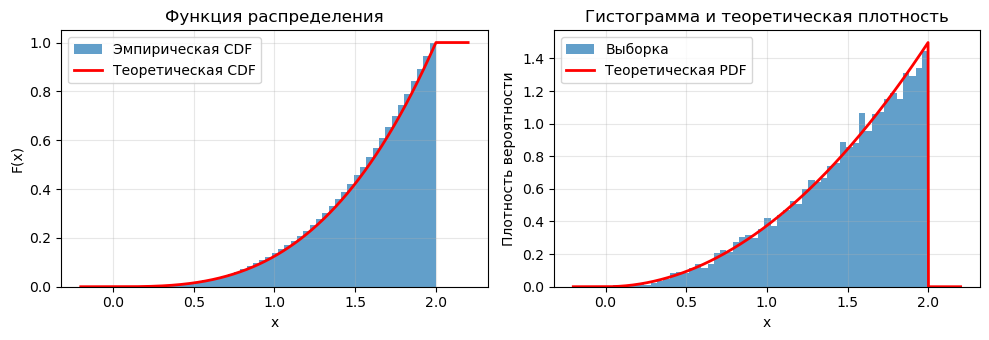

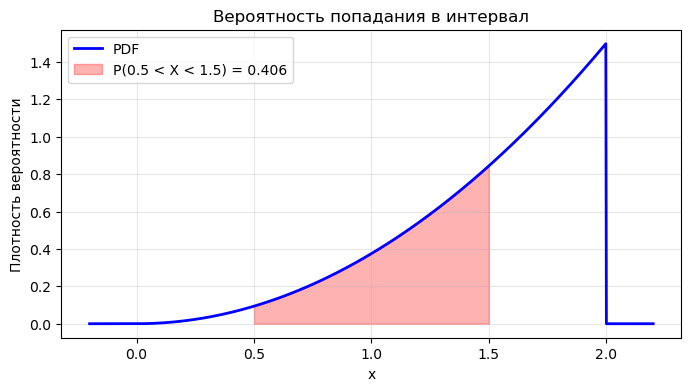

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

class CustomDistribution(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='custom_dist')
    
    def _pdf(self, x):
        result = np.zeros_like(x)
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = (3 / 8) * x[mask] ** 2
        return result
    
    def _cdf(self, x):
        result = np.zeros_like(x)
        result[x < self.a] = 0
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = (1 / 8) * x[mask] ** 3
        result[x > self.b] = 1
        return result
    
    def _ppf(self, q):
        return (8 * q) ** (1/3)

a, b = 0.0, 2.0
custom_dist = CustomDistribution(a, b) 

print("=" * 50)
print("ПРОВЕРКА НОРМИРОВКИ ПЛОТНОСТИ")
print("=" * 50)
integral, error = integrate.quad(custom_dist.pdf, a, b)
print(f"∫f(x)dx на [{a}, {b}] = {integral:.6f} (ошибка: {error:.2e})")

print("\nПРОВЕРКА В ГРАНИЧНЫХ ТОЧКАХ")
print(f"F({a}) = {custom_dist.cdf(a):.6f}")
print(f"F({b}) = {custom_dist.cdf(b):.6f}")

np.random.seed(42)
sample = custom_dist.rvs(size=10000)

print(f"\nРазмер выборки: {len(sample)}")
print(f"Первые 10 значений: {sample[:10]}")

print("\n" + "ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ".center(50, '*'))
print(f"Математическое ожидание: {custom_dist.mean():.4f}")
print(f"Дисперсия: {custom_dist.var():.4f}")
print(f"Среднее квадратическое отклонение: {custom_dist.std():.4f}")

q = 0.7
p = 80  
print(f"\n{q:.0%}-квантиль: {custom_dist.ppf(q):.4f}")
print(f"{p}%-ная точка: {custom_dist.ppf(p/100):.4f}")

mean, variance, skewness, kurtosis = custom_dist.stats(moments='mvsk')
print("\nКОЭФФИЦИЕНТЫ ФОРМЫ РАСПРЕДЕЛЕНИЯ")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Коэффициент эксцесса: {kurtosis:.4f}")

interval_start, interval_end = 0.5, 1.5
prob_interval = custom_dist.cdf(interval_end) - custom_dist.cdf(interval_start)
print(f"\nP({interval_start} < X < {interval_end}) = {prob_interval:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
x_plot = np.linspace(a - 0.2, b + 0.2, 1000)

ax1.hist(sample, bins=50, density=True, cumulative=True, alpha=0.7, label='Эмпирическая CDF')
ax1.plot(x_plot, custom_dist.cdf(x_plot), 'r-', linewidth=2, label='Теоретическая CDF')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Функция распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(sample, bins=50, density=True, alpha=0.7, label='Выборка')
ax2.plot(x_plot, custom_dist.pdf(x_plot), 'r-', linewidth=2, label='Теоретическая PDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность вероятности')
ax2.set_title('Гистограмма и теоретическая плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
x_fill = np.linspace(interval_start, interval_end, 100)
ax.plot(x_plot, custom_dist.pdf(x_plot), 'b-', linewidth=2, label='PDF')
ax.fill_between(x_fill, custom_dist.pdf(x_fill), alpha=0.3, color='red', 
                label=f'P({interval_start} < X < {interval_end}) = {prob_interval:.3f}')
ax.set_xlabel('x')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Вероятность попадания в интервал')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()